In [1]:
import pandas as pd 
import numpy as  np 
from matplotlib import pyplot as plt 
import seaborn as sns

In [2]:
data = pd.read_csv('result/res_data_all.csv' , index_col=0)
display(data.head(2))
info_cols = ['true_class' , 'src_n' , 'src_id' , 'th_class' , 'is_ok' , 'truth' , 'pred_class' , 'pred_prob' , 'clf_type']
data_val = data.drop(columns=info_cols)
data_info = data[info_cols]
#display(data_val.head(2))
#display(data_info.head(2))

,src_id,src_n,true_class,pred_class,pred_prob,th_class,is_ok,truth,clf_type,var_inter_index,...,flux_aper_lolim,photflux_aper,flux_aper_lolim_m,hard_hs_hilim,flux_aper_hilim_m,hard_ms_hilim,hard_ms,hard_hm,powlaw_gamma_hilim,flux_aper_b
0,BH0027,J1745-2900,BH,BH,0.95,BH,1,1,train,0.875,...,0.674128,0.568633,0.382339,1.000000,0.366575,0.532276,0.000000,1.000000,0.026430,0.605405
1,NS0044,XMMU J004245.2+41172,NS,NS,1.00,NS,1,1,train,1.000,...,0.748284,0.692051,0.642892,0.481078,0.638301,0.392327,0.298129,0.591855,0.275395,0.685041


In [3]:
from sklearn.decomposition import PCA

In [4]:
pca =  PCA(n_components=3, copy=True , whiten=True)
pca.fit(data_val)
red_data = pca.transform(data_val)
red_data = np.asarray(red_data)
red_data = pd.DataFrame(red_data , columns=np.arange(red_data.shape[1])).reset_index(drop=True) 
display(red_data)

,0,1,2
0,-1.164154,1.720029,-0.397417
1,0.490789,-0.121620,-1.283284
2,2.143878,1.112654,-0.541135
3,-1.514710,1.174473,-1.010354
4,0.115564,-1.064989,0.861362
...,...,...,...
455,-1.050377,1.256925,0.317545
456,0.349713,-1.012793,1.023259
457,0.292830,-0.370723,-1.019684
458,-0.068465,-1.112898,-0.831616


In [5]:
data_info = data_info.reset_index(drop=True) 
display(data_info.head(2))

,true_class,src_n,src_id,th_class,is_ok,truth,pred_class,pred_prob,clf_type
0,BH,J1745-2900,BH0027,BH,1,1,BH,0.95,train
1,NS,XMMU J004245.2+41172,NS0044,NS,1,1,NS,1.00,train


In [6]:
pca_data = pd.concat([data_info , red_data] , axis=1)
display(pca_data.head(2))

,true_class,src_n,src_id,th_class,is_ok,truth,pred_class,pred_prob,clf_type,0,1,2
0,BH,J1745-2900,BH0027,BH,1,1,BH,0.95,train,-1.164154,1.720029,-0.397417
1,NS,XMMU J004245.2+41172,NS0044,NS,1,1,NS,1.00,train,0.490789,-0.121620,-1.283284


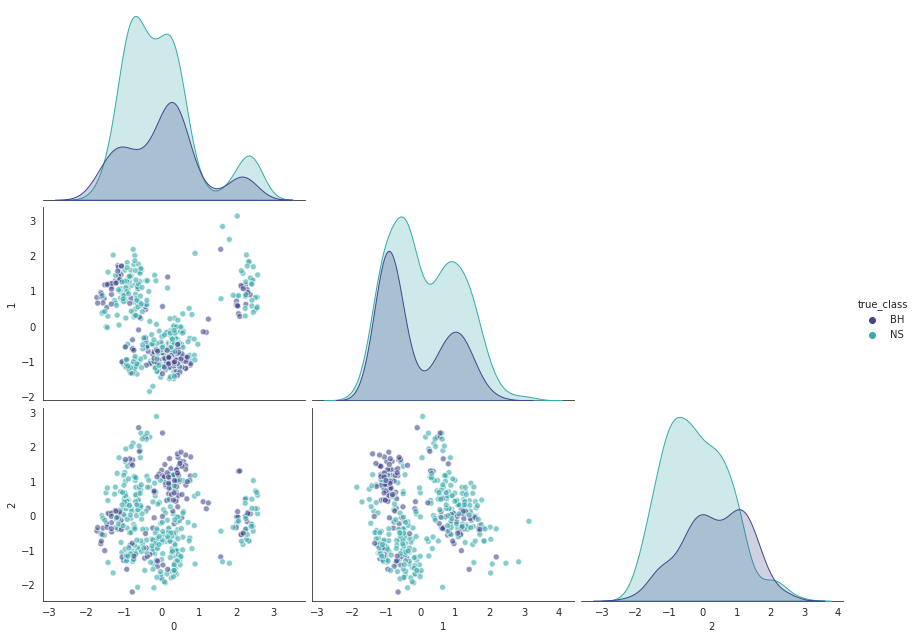

In [7]:
sns.set_style('white')
#sns.set_theme('paper')
sns.set_palette('dark')
#plt.style.use('seaborn-dark-palette')
#selectes_src = ['NS0001' , 'NS0078' , 'NS0076' , 'BH0018' , 'BH0019' , 'NS0020']
feat_names = np.arange(red_data.shape[1])
sns.pairplot(
    #data = pca_data[pca_data['src_id'].isin(selectes_src)], 
    data = pca_data ,  
    x_vars=feat_names, 
    y_vars = feat_names , 
    kind='scatter' ,  
    hue='true_class', 
    height=3 , aspect=8/6 , 
    plot_kws=dict(marker="o", linewidth=1 , alpha=0.6),
    palette='mako' , corner=True
)
plt.show()

In [8]:
pca_data.shape

(460, 12)